In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import shutil
import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/audios_FOR/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/audios_FOR/amostra_FOR/fake'

In [ ]:
# Listar os arquivos e subpastas
print(os.listdir(file_path_real))
print(os.listdir(file_path_fake))

['file10738.wav', 'file10993.wav', 'file10731.wav', 'file10737.wav', 'file1073.wav', 'file10948.wav', 'file10732.wav', 'file10733.wav', 'file10730.wav', 'file10736.wav', 'file10734.wav', 'file10739.wav', 'file10925.wav', 'file1070.wav', 'file1067.wav', 'file1065.wav', 'file1069.wav', 'file1066.wav', 'file1072.wav', 'file1071.wav', 'file10899.wav', 'file10727.wav', 'file10728.wav', 'file10897.wav', 'file1068.wav', 'file1057.wav', 'file10859.wav', 'file1060.wav', 'file1064.wav', 'file1059.wav', 'file1063.wav', 'file1061.wav', 'file1058.wav', 'file1062.wav', 'file1056.wav', 'file10850.wav', 'file1055.wav', 'file10753.wav', 'file1051.wav', 'file1048.wav', 'file1049.wav', 'file1054.wav', 'file1050.wav', 'file1052.wav', 'file10.wav', 'file10735.wav', 'file1046.wav', 'file1053.wav', 'file1047.wav', 'file1.wav', 'file11026.wav', 'file10844.wav', 'file10845.wav', 'file7.wav', 'file10835.wav', 'file10837.wav', 'file34603.wav', 'file10831.wav', 'file10838.wav', 'file10839.wav', 'file10833.wav', '

In [ ]:
# Função para processar os áudios em uma pasta
def process_audio_files(folder_path):

    for audio_file in os.listdir(folder_path):
        audio_path = os.path.join(folder_path, audio_file)

        # Carregar o áudio
        y, sr = librosa.load(audio_path, sr=None)

        # Mostrar informações do áudio
        print(f"Arquivo: {audio_file}, Duração: {len(y) / sr:.2f}s, Taxa de amostragem: {sr}Hz")

        # Plotar waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform de {audio_file}")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.show()

In [ ]:
# Processar áudios Real
#process_audio_files(file_path_real)

In [ ]:
# Processar áudios Fake
#process_audio_files(file_path_fake)

In [ ]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Média dos coeficientes

# Carregar dados e rótulos
data = []
labels = []

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(0)  # Rótulo 0 para Fake

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(1)  # Rótulo 1 para Real

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-260.212952,117.519318,-15.745616,8.093985,-11.519000,-1.386122,-8.235324,-10.991035,-5.606129,-10.187272,4.918403,-15.212114,6.887709,0
1,-284.164429,108.369370,-22.230904,-1.420413,1.204101,3.490436,3.256173,-9.436519,-2.958894,-2.939050,-8.334983,-9.500324,-3.607038,0
2,-283.567078,60.110302,-6.426463,9.742021,0.360690,3.053292,-4.509871,0.225041,-2.588204,-4.998402,-6.516211,-7.938780,-2.652726,0
3,-352.587250,54.436386,6.717391,61.306046,4.226371,-24.166927,-7.775321,1.407538,-27.090137,-9.622373,-4.637008,-20.375238,-9.162545,0
4,-390.693115,58.567242,24.099009,48.153767,22.338835,-41.093349,-20.420021,-15.520763,-27.768366,-16.963541,-9.598381,4.470574,-6.683288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,-292.848969,176.708817,-32.187325,9.348004,-6.134777,-8.695621,-6.118189,-24.396040,-14.858586,-10.240005,-1.559455,-8.549175,-9.291343,1
829,-255.822311,105.582916,0.566006,25.179556,3.570448,4.460421,-4.810865,2.187665,-7.396468,4.928065,-1.848025,1.591320,2.278680,1
830,-432.503387,52.231987,24.130854,24.908005,5.230207,10.177417,1.667769,11.312072,14.200116,13.155353,9.546826,18.923155,7.199302,1
831,-277.871552,78.810860,2.433609,24.534931,-9.145662,-23.487030,-17.206375,-24.818230,-29.554996,0.559592,-17.690292,-5.824588,-15.034236,1


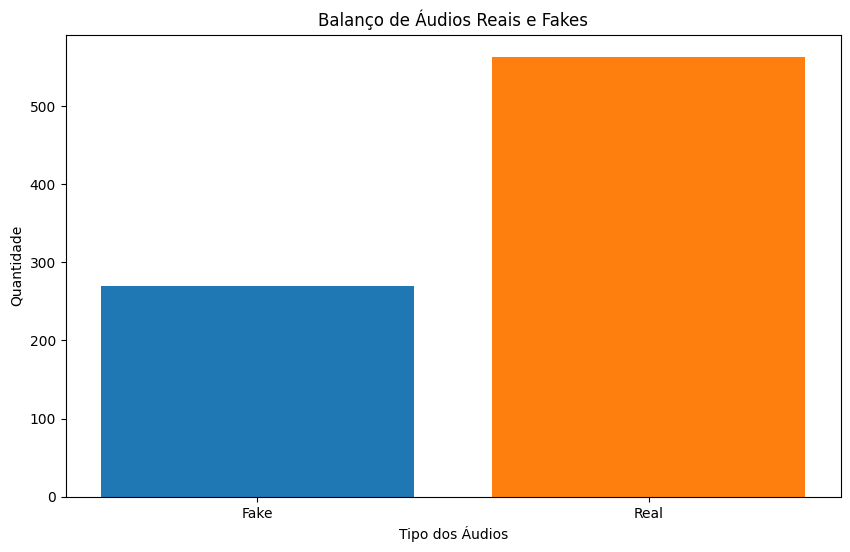

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels.count(0), labels.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df.drop(columns=['label'])
y = df['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.92
Precisão: 0.92
Recall: 0.96
F1-Score: 0.94


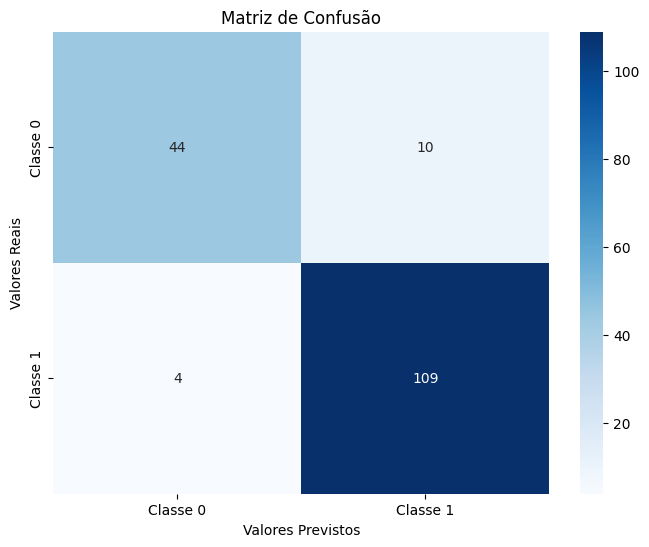

In [ ]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Inversão Temporal
def reverse_audio(y):
    return y[::-1]

In [ ]:
# Caminho para os dados no Google Drive
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_invertido'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com inversão temporal
data_reverse = []  # Dados com inversão temporal
labels_reverse = []  # Rótulos com inversão temporal

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features)
    labels_reverse.append(0)  # Rótulo "fake"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features_reversed)
    labels_reverse.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'fake' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'fake', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features)
    labels_reverse.append(1)  # Rótulo "real"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse.append(features_reversed)
    labels_reverse.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'real' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'real', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

In [ ]:
# Converter para DataFrame
df_reverse = pd.DataFrame(data_reverse)
df_reverse['label'] = labels_reverse

In [ ]:
df_reverse

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-260.212952,117.519318,-15.745616,8.093985,-11.519000,-1.386122,-8.235324,-10.991035,-5.606129,-10.187272,4.918403,-15.212114,6.887709,0
1,-259.938721,117.454369,-15.542598,8.074220,-11.390839,-1.460114,-8.341921,-10.984516,-5.648251,-10.123317,4.822381,-15.128308,6.851481,0
2,-284.164429,108.369370,-22.230904,-1.420413,1.204101,3.490436,3.256173,-9.436519,-2.958894,-2.939050,-8.334983,-9.500324,-3.607038,0
3,-284.710236,108.459610,-22.479301,-0.832057,1.369552,3.215976,3.215661,-9.511812,-2.876156,-2.932394,-8.448421,-9.461828,-3.613703,0
4,-283.567078,60.110302,-6.426463,9.742021,0.360690,3.053292,-4.509871,0.225041,-2.588204,-4.998402,-6.516211,-7.938780,-2.652726,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,-432.628448,52.007023,24.240030,24.882080,5.257833,10.276168,1.710761,11.365218,14.181542,13.194204,9.546244,18.923372,7.173491,1
1662,-277.871552,78.810860,2.433609,24.534931,-9.145662,-23.487030,-17.206375,-24.818230,-29.554996,0.559592,-17.690292,-5.824588,-15.034236,1
1663,-278.045471,79.267891,2.488929,24.092625,-8.696362,-23.366478,-17.262341,-24.870195,-29.443710,0.511089,-17.702290,-5.982671,-14.964988,1
1664,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1


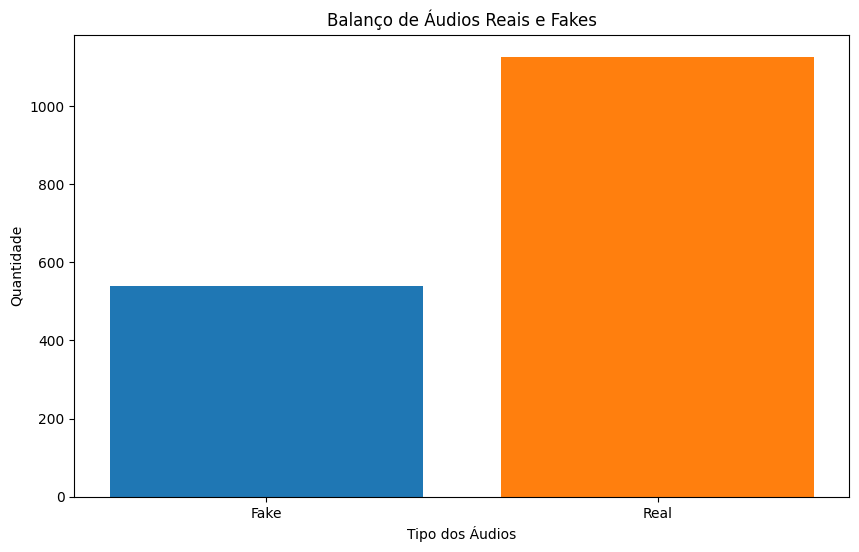

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_reverse.count(0), labels_reverse.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df_reverse.drop(columns=['label'])
y = df_reverse['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.98
Precisão: 0.98
Recall: 0.99
F1-Score: 0.99


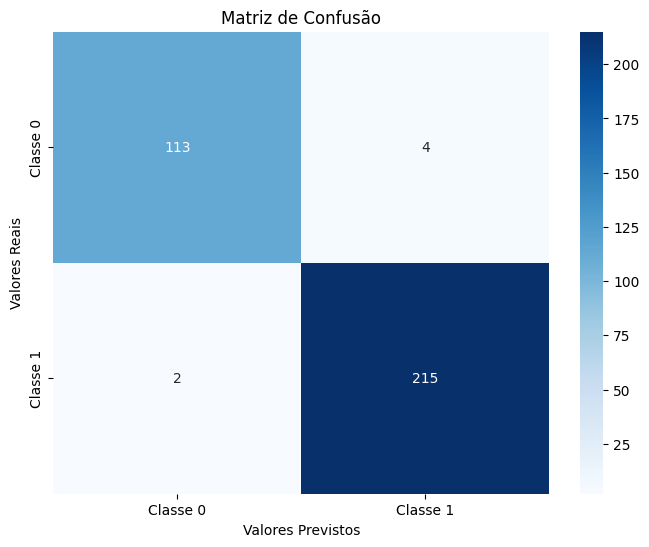

In [ ]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
output_path = '/content/drive/MyDrive/audios_FOR/amostra_FOR_invertido_balanced'

# Criação das pastas de destino se não existirem
os.makedirs(os.path.join(output_path, 'real'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'fake'), exist_ok=True)

# Listas para armazenar as características e rótulos com inversão temporal balanceada
data_reverse_balanced = []  # Dados com inversão temporal balanceada
labels_reverse_balanced = []  # Rótulos com inversão temporal balanceada

# Função para balancear os dados usando replicação simples
def balance_data(real_files, fake_files):
    """Balanceia os dados replicando aleatoriamente as amostras da classe minoritária."""
    len_real = len(real_files)
    len_fake = len(fake_files)

    # Verificar qual classe tem menos amostras
    if len_real > len_fake:
        # Replicar os arquivos 'fake' até igualar o número
        fake_files += random.choices(fake_files, k=len_real - len_fake)
    elif len_fake > len_real:
        # Replicar os arquivos 'real' até igualar o número
        real_files += random.choices(real_files, k=len_fake - len_real)

    return real_files, fake_files

# Obter listas de arquivos reais e fakes
real_files = os.listdir(file_path_real)
fake_files = os.listdir(file_path_fake)

# Balancear os arquivos
real_files, fake_files = balance_data(real_files, fake_files)

# Processar Fake
for file_name in fake_files:
    file_path = os.path.join(file_path_fake, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features)
    labels_reverse_balanced.append(0)  # Rótulo "fake"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features_reversed)
    labels_reverse_balanced.append(0)  # Rótulo "fake"

    # Salvar áudio original na pasta 'fake'
    output_file_path = os.path.join(output_path, 'fake', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'fake' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'fake', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

# Processar Real
for file_name in real_files:
    file_path = os.path.join(file_path_real, file_name)
    y, sr = librosa.load(file_path, sr=None)

    # Versão original
    features = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features)
    labels_reverse_balanced.append(1)  # Rótulo "real"

    # Aplicar inversão temporal
    y_reversed = reverse_audio(y)  # Inversão temporal
    features_reversed = np.mean(librosa.feature.mfcc(y=y_reversed, sr=sr, n_mfcc=13).T, axis=0)
    data_reverse_balanced.append(features_reversed)
    labels_reverse_balanced.append(1)  # Rótulo "real"

    # Salvar áudio original na pasta 'real'
    output_file_path = os.path.join(output_path, 'real', file_name)
    sf.write(output_file_path, y, sr)  # Salvando a versão original

    # Salvar áudio com inversão temporal na pasta 'real' (com sufixo "_reversed")
    output_file_path_reversed = os.path.join(output_path, 'real', file_name.replace('.wav', '_reversed.wav'))
    sf.write(output_file_path_reversed, y_reversed, sr)  # Salvando a versão com inversão temporal

In [ ]:
# Converter para DataFrame
data_reverse_balanced = pd.DataFrame(data_reverse_balanced)
data_reverse_balanced['label'] = labels_reverse_balanced

In [ ]:
data_reverse_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-260.212952,117.519318,-15.745616,8.093985,-11.519000,-1.386122,-8.235324,-10.991035,-5.606129,-10.187272,4.918403,-15.212114,6.887709,0
1,-259.938721,117.454369,-15.542598,8.074220,-11.390839,-1.460114,-8.341921,-10.984516,-5.648251,-10.123317,4.822381,-15.128308,6.851481,0
2,-284.164429,108.369370,-22.230904,-1.420413,1.204101,3.490436,3.256173,-9.436519,-2.958894,-2.939050,-8.334983,-9.500324,-3.607038,0
3,-284.710236,108.459610,-22.479301,-0.832057,1.369552,3.215976,3.215661,-9.511812,-2.876156,-2.932394,-8.448421,-9.461828,-3.613703,0
4,-283.567078,60.110302,-6.426463,9.742021,0.360690,3.053292,-4.509871,0.225041,-2.588204,-4.998402,-6.516211,-7.938780,-2.652726,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,-432.628448,52.007023,24.240030,24.882080,5.257833,10.276168,1.710761,11.365218,14.181542,13.194204,9.546244,18.923372,7.173491,1
2248,-277.871552,78.810860,2.433609,24.534931,-9.145662,-23.487030,-17.206375,-24.818230,-29.554996,0.559592,-17.690292,-5.824588,-15.034236,1
2249,-278.045471,79.267891,2.488929,24.092625,-8.696362,-23.366478,-17.262341,-24.870195,-29.443710,0.511089,-17.702290,-5.982671,-14.964988,1
2250,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1


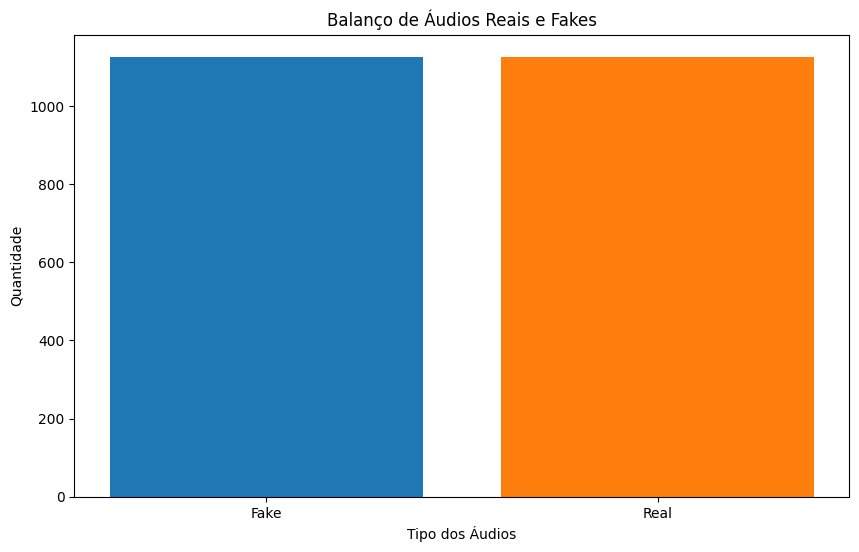

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels_reverse_balanced.count(0), labels_reverse_balanced.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = data_reverse_balanced.drop(columns=['label'])
y = data_reverse_balanced['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 1.00
Precisão: 0.99
Recall: 1.00
F1-Score: 1.00


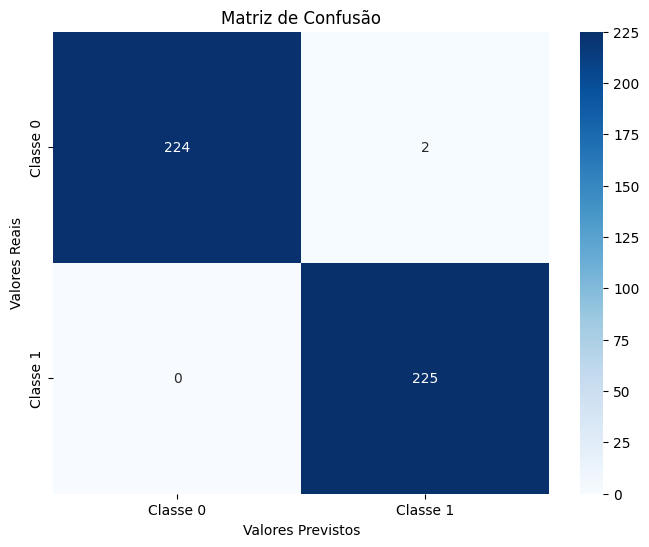

In [ ]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()